<a href="https://colab.research.google.com/github/lilianapayares16-droid/BASE-CCVM-2024/blob/main/An%C3%A1lisis_exploratorio_y_modelado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TFM - Predicción del Riesgo Cardiovascular Mediante Análisis Exploratorio y Modelos de Machine Learning Sobre Datos Clínicos

In [1]:
# Librerías base
import numpy as np
import pandas as pd
from IPython.display import display


# Para Visualización
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import unicodedata

# Para el modelado - Preprocesamiento
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score,
                             RocCurveDisplay, accuracy_score, precision_score, recall_score,
 f1_score)

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

sns.set_context("notebook")


# Fase I Analisis exploratorio de los datos

In [ ]:
url = "https://raw.githubusercontent.com/lilianapayares16-droid/BASE-CCVM-2024/main/BASE%20CCVM%202024.xlsx"

In [ ]:
df = pd.read_excel(url)

In [ ]:
## Fase I — Análisis Exploratorio (EDA)
print("Filas, columnas:", df.shape)
display(df.sample(5, random_state=42))


Filas, columnas: (7339, 25)


,fecha_nacimiento,edad,sexo,curso_vida,pertenencia_etnica,grupo_poblacional,Discapacidad,pais,departamento,municipio_divipola,...,imc,clasificacion_imc,tension_arterial_sistolica,tension_arterial_diastolica,creatinina,hemoglobina_glicosilada,albuminuria,colesterol_total,resultado_hdl,resultado_ldl
996,1965-08-05,59,F,Adultez,Ninguna,Otro grupo poblacional,Sin discapacidad,Colombia,CORDOBA,23001,...,30.297784,Obesidad,120,70,0.75,7.15,25.00,280.85,64.16,178.49
736,1979-04-03,45,M,Adultez,Ninguna,Otro grupo poblacional,Sin discapacidad,Colombia,CORDOBA,23001,...,29.878567,Sobrepeso,110,80,0.50,0.20,223.00,255.00,42.00,110.00
1244,1925-12-16,99,F,Vejez,Ninguna,Otro grupo poblacional,Sin discapacidad,Colombia,CORDOBA,23001,...,22.031726,Normal,140,70,0.90,0.80,22.00,128.00,65.00,90.00
1181,1954-01-28,70,F,Vejez,Ninguna,Otro grupo poblacional,Sin discapacidad,Colombia,CORDOBA,23001,...,28.577961,Sobrepeso,140,80,0.89,0.20,12.81,231.62,36.83,152.06
3307,1974-10-04,50,F,Adultez,Ninguna,Otro grupo poblacional,Sin discapacidad,Colombia,CORDOBA,23001,...,32.049982,Obesidad,120,80,1.01,0.20,25.00,268.57,70.40,180.86


**Caracterización de las variables**

In [ ]:
# Variables Sociodemográficas

vars_demo = [
    'edad',
    'sexo',
    'curso_vida'
]

# Variables Antropométricas

vars_antrop = [
    'peso',
    'talla',
    'imc',
    'clasificacion_imc'
]

# Variables Clínicas cardiovasculares

vars_clinicas = [
    'tension_arterial_sistolica',
    'tension_arterial_diastolica'
]

# Variables Metabólicas, renales y lipídicas

vars_labs = [
    'creatinina',
    'hemoglobina_glicosilada',
    'albuminuria',
    'colesterol_total',
    'resultado_hdl',
    'resultado_ldl'
]

# Variables numéricas

vars_numericas = [
    'edad',
    'peso',
    'talla',
    'imc',
    'tension_arterial_sistolica',
    'tension_arterial_diastolica',
    'creatinina',
    'hemoglobina_glicosilada',
    'albuminuria',
    'colesterol_total',
    'resultado_hdl',
    'resultado_ldl'
]


**Estadística descriptiva**

In [ ]:
desc_numericas = df[vars_numericas].describe().T.round(2)
desc_numericas


,count,mean,std,min,25%,50%,75%,max
edad,7339.0,64.55,11.54,15.00,57.00,66.00,72.00,102.00
peso,7339.0,74.53,14.70,10.00,65.00,73.00,83.00,174.00
talla,7339.0,1.64,0.09,1.20,1.57,1.64,1.70,2.24
imc,7339.0,27.68,4.65,2.89,24.62,27.18,30.27,61.71
tension_arterial_sistolica,7339.0,124.20,12.71,70.00,120.00,120.00,130.00,220.00
tension_arterial_diastolica,7339.0,76.78,8.47,20.00,70.00,80.00,80.00,130.00
creatinina,7339.0,1.07,0.32,0.40,0.88,1.02,1.21,3.44
hemoglobina_glicosilada,7339.0,2.53,3.32,0.20,0.20,0.70,6.00,18.27
albuminuria,7339.0,51.22,54.39,10.00,25.00,28.00,51.00,399.00
colesterol_total,7339.0,191.23,48.92,38.00,155.29,188.00,221.00,393.88


In [ ]:
#Variables categoricas

vars_categoricas = [
    'sexo',
    'curso_vida',
    'clasificacion_imc'
]

for var in vars_categoricas:
    print(f"\nDistribución de {var}")

    tabla = pd.DataFrame({
        'Frecuencia': df[var].value_counts(dropna=False),
        'Porcentaje (%)': df[var].value_counts(normalize=True, dropna=False) * 100
    }).round(2)

    display(tabla)


Distribución de sexo


,Frecuencia,Porcentaje (%)
sexo,,
F,4039,55.03
M,3300,44.97



Distribución de curso_vida


,Frecuencia,Porcentaje (%)
curso_vida,,
Vejez,5045,68.74
Adultez,2259,30.78
Primera Infancia,17,0.23
Juventud,16,0.22
Adolescencia,2,0.03



Distribución de clasificacion_imc


,Frecuencia,Porcentaje (%)
clasificacion_imc,,
Sobrepeso,3387,46.15
Obesidad,1974,26.90
Normal,1907,25.98
Delgadez o bajo peso,71,0.97


In [ ]:
#Caracterización de la población por municipios

def normalizar(texto: str) -> str:
    if pd.isna(texto):
        return ""
    texto = str(texto).strip().upper()
    texto = "".join(
        c for c in unicodedata.normalize("NFD", texto)
        if unicodedata.category(c) != "Mn"
    )
    return texto

df["municipio_residencia"] = df["municipio_residencia"].apply(normalizar)

conteo_mpio = (
    df["municipio_residencia"]
    .value_counts(dropna=False)
    .rename_axis("Municipio de residencia")
    .reset_index(name="N° de pacientes")
)

conteo_mpio


,Municipio de residencia,N° de pacientes
0,MONTERIA,4262
1,LORICA,821
2,SAHAGUN,708
3,CERETE,589
4,PLANETA RICA,356
5,MONTELIBANO,305
6,AYAPEL,191
7,BUENAVISTA,54
8,MOMIL,21
9,CHIMA,17


In [ ]:
# Valores nulos
missing = (df.isna().mean()*100).sort_values(ascending=False)
missing = missing[missing > 0]

if missing.empty:
    print("Sin valores nulos")
else:
    plt.figure()
    missing.head(20).plot(kind="bar")
    plt.title("% de valores faltantes (top 20)")
    plt.ylabel("%")
    plt.show()



Sin valores nulos


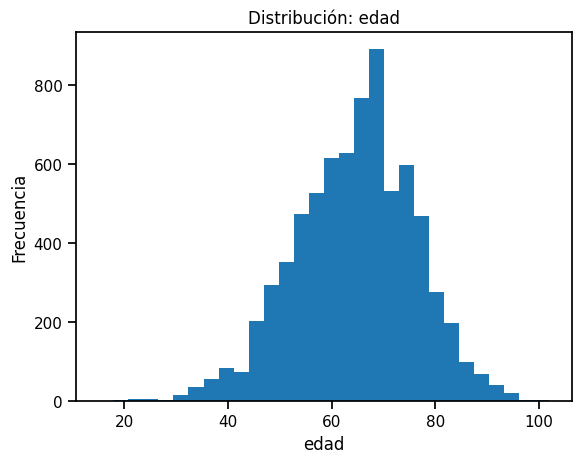

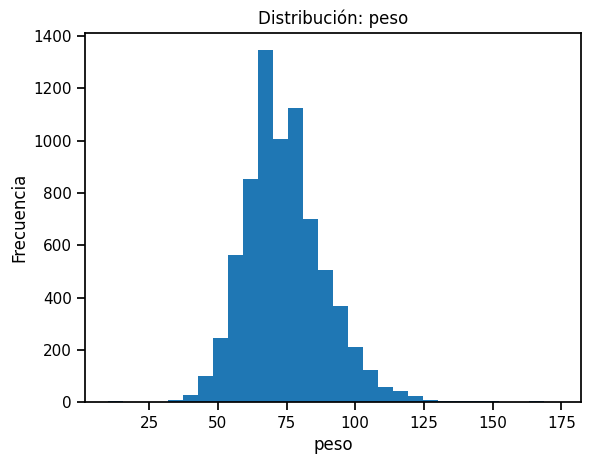

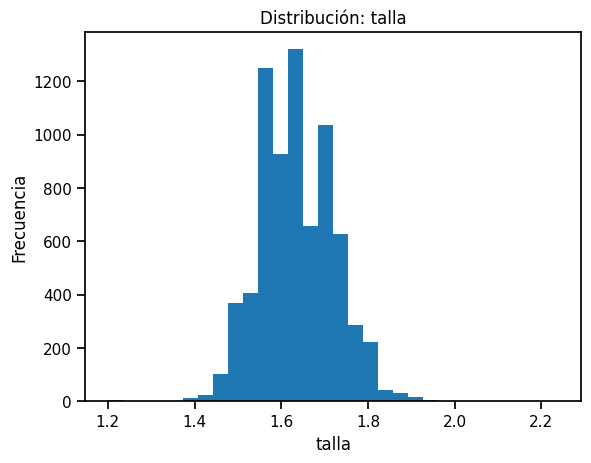

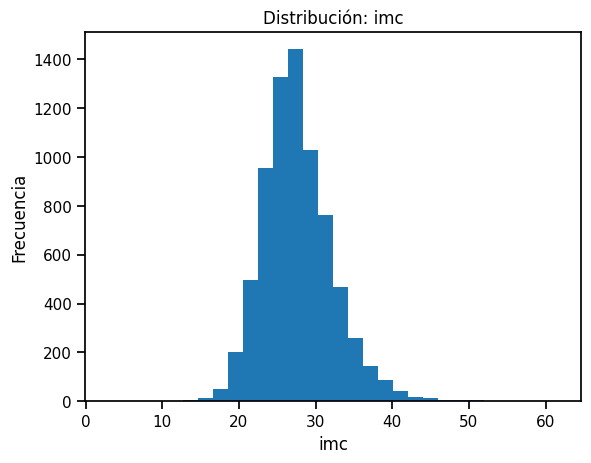

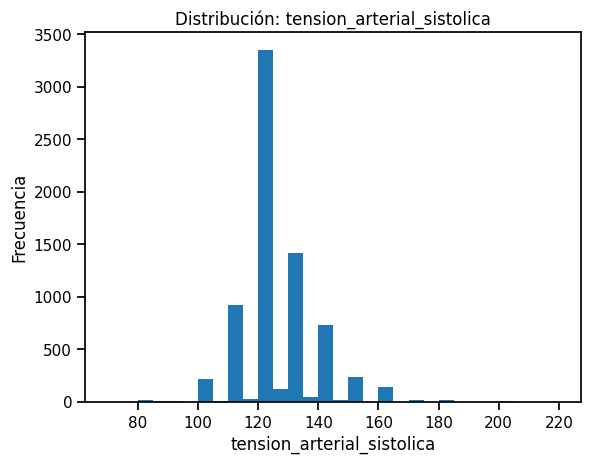

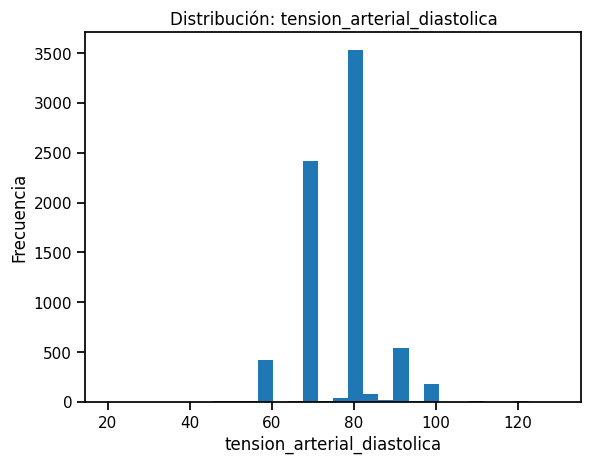

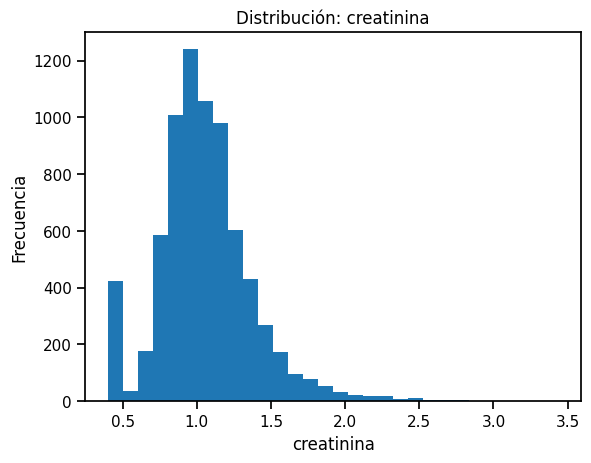

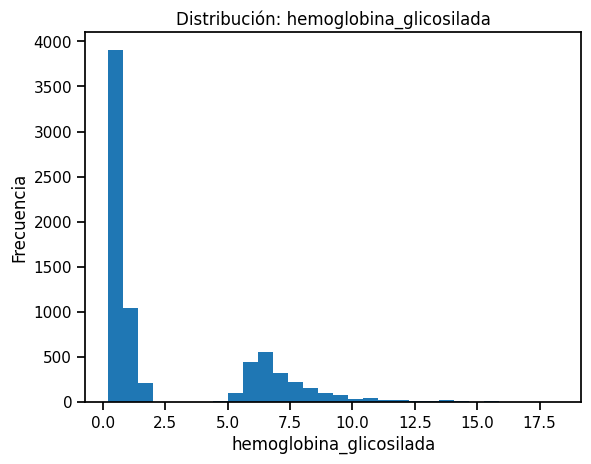

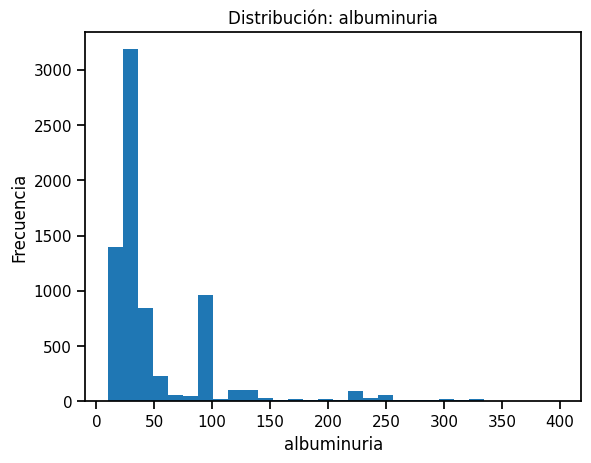

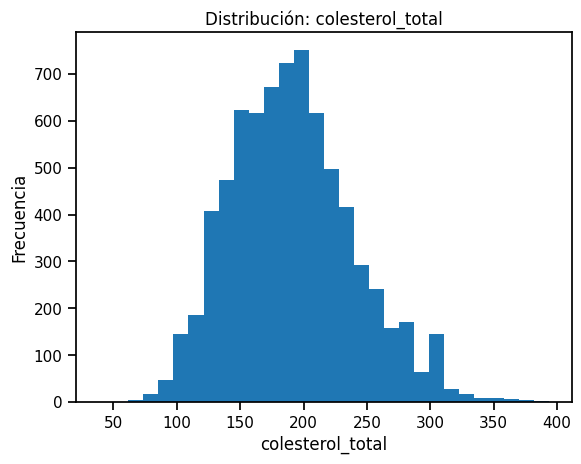

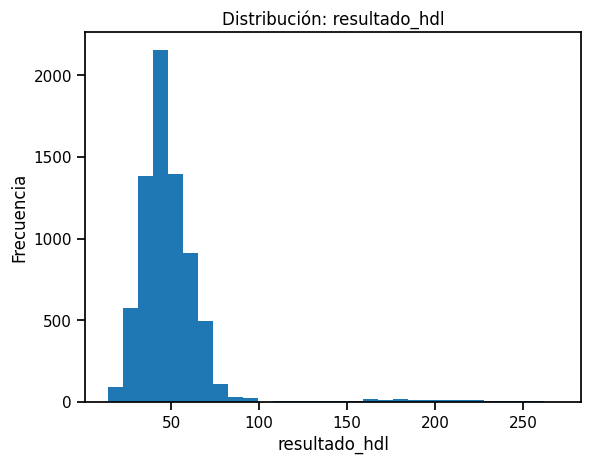

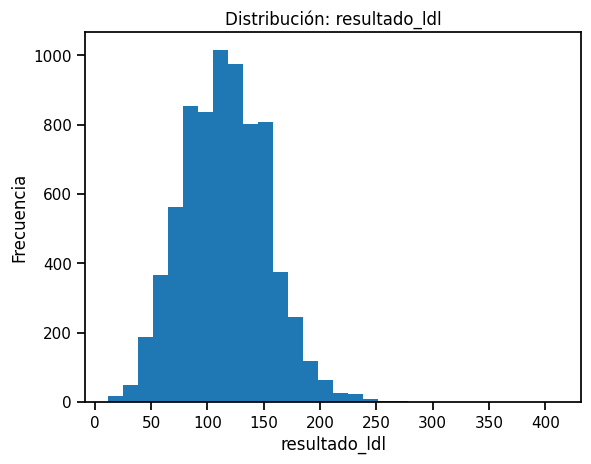

In [ ]:
#Distribución de variables númericas

num_cols = df.select_dtypes(include=["number"]).columns.tolist()
excluir_cols = ["longitud","latitud", "municipio_divipola", "clasificacion_imc"]
num_cols_validas = [c for c in num_cols if c not in excluir_cols]

for col in num_cols_validas[:12]:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Distribución: {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

# Fase II — Preparación y Preprocesamiento

In [ ]:
#Variables

vars_numericas = [
    'edad', 'peso', 'talla', 'imc',
    'tension_arterial_sistolica', 'tension_arterial_diastolica',
    'creatinina', 'hemoglobina_glicosilada', 'albuminuria',
    'colesterol_total', 'resultado_hdl', 'resultado_ldl'
]

vars_categoricas = [
    'sexo', 'curso_vida', 'clasificacion_imc'
]

# Convertir numéricas
for col in vars_numericas:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Normalizar categóricas
for col in vars_categoricas:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().replace({"nan": np.nan, "None": np.nan})

In [ ]:
# Reglas clínicas simples para depurar errores evidentes

def set_nan_if_out_of_range(s, low=None, high=None):
    s = s.copy()
    if low is not None:
        s = s.where(s >= low, np.nan)
    if high is not None:
        s = s.where(s <= high, np.nan)
    return s


# Aplicar reglas clínicas

if 'edad' in df.columns:
    df['edad'] = set_nan_if_out_of_range(df['edad'], low=0, high=110)

if 'tension_arterial_sistolica' in df.columns:
    df['tension_arterial_sistolica'] = set_nan_if_out_of_range(
        df['tension_arterial_sistolica'], low=60, high=260
    )

if 'tension_arterial_diastolica' in df.columns:
    df['tension_arterial_diastolica'] = set_nan_if_out_of_range(
        df['tension_arterial_diastolica'], low=30, high=160
    )

if 'imc' in df.columns:
    df['imc'] = set_nan_if_out_of_range(df['imc'], low=10, high=70)

In [ ]:
#Definir variable objetivo (target)


# Inicializar contador de factores de riesgo
df['factores_riesgo'] = 0

# Hipertensión
df.loc[
    (df['tension_arterial_sistolica'] >= 140) |
    (df['tension_arterial_diastolica'] >= 90),
    'factores_riesgo'
] += 1

# Dislipidemia
df.loc[
    (df['resultado_ldl'] >= 100) |
    (df['colesterol_total'] >= 200),
    'factores_riesgo'
] += 1

# Diabetes (HbA1c)
df.loc[
    df['hemoglobina_glicosilada'] >= 6.5,
    'factores_riesgo'
] += 1

# Sobrepeso u obesidad
df.loc[
    df['imc'] >= 30,
    'factores_riesgo'
] += 1

# Daño renal (albuminuria elevada)
df.loc[
    df['albuminuria'] > 300,
    'factores_riesgo'
] += 1

# Crear variable objetivo binaria
df['riesgo_cardiovascular'] = np.where(
    df['factores_riesgo'] >= 2, 1, 0
)

# Ver distribución
df['riesgo_cardiovascular'].value_counts(normalize=True).round(3)


,proportion
riesgo_cardiovascular,
0,0.609
1,0.391


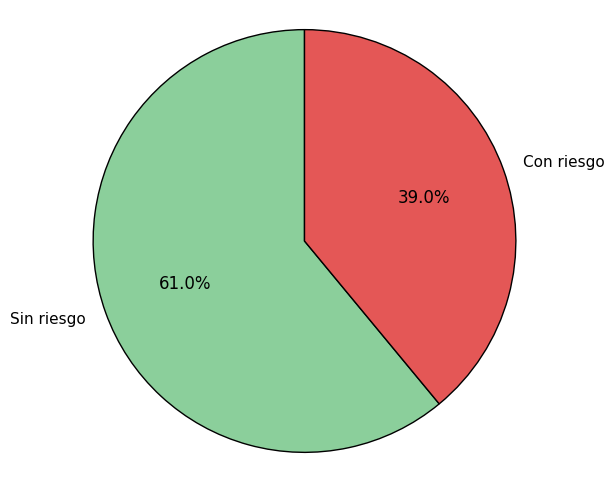

In [ ]:
#Proporción de pacientes según riesgo cardiovascular

import matplotlib.pyplot as plt

# Datos
labels = ['Sin riesgo', 'Con riesgo']
values = [0.61, 0.39]

# Colores (verde suave y rojo medio)
colors = ['#8BCF9B', '#E45756']

plt.figure(figsize=(6,6))
plt.pie(
    values,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)

plt.axis('equal')
plt.show()


In [ ]:
#Factor de riesgo

df['factores_riesgo'].value_counts().sort_index()


,count
factores_riesgo,
0,1223
1,3249
2,2221
3,575
4,71


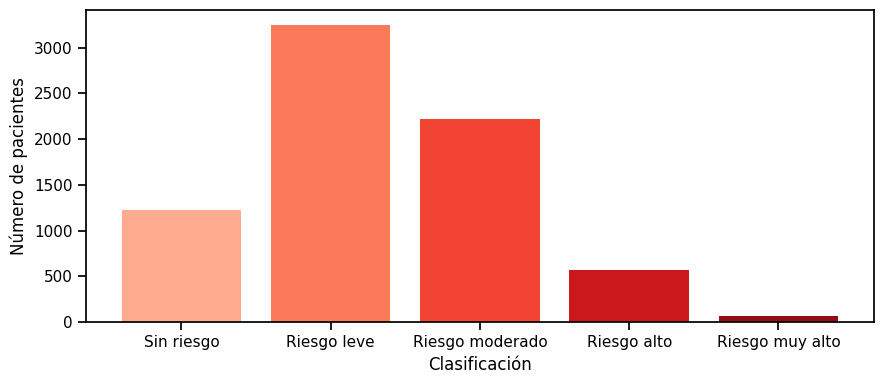

In [ ]:
# Distribución de factores de riesgo cardiovascular

# Mapeo clínico de factores de riesgo
labels_riesgo = {
    0: "Sin riesgo",
    1: "Riesgo leve",
    2: "Riesgo moderado",
    3: "Riesgo alto",
    4: "Riesgo muy alto"
}

# Conteo
conteo = df["factores_riesgo"].value_counts().sort_index()

conteo.index = conteo.index.map(labels_riesgo)

colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(conteo)))

plt.figure(figsize=(9,4))
bars = plt.bar(conteo.index, conteo.values)

for bar, color in zip(bars, colors):
    bar.set_facecolor(color)

plt.xlabel("Clasificación")
plt.ylabel("Número de pacientes")


plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Definir variable objetivo (target) y preparar dataset

target = 'riesgo_cardiovascular'
if target not in df.columns:
    raise ValueError(f"No encuentro la columna objetivo '{target}'.")

# Target NO sea NaN
df = df.dropna(subset=[target]).copy()

# Target sea binario 0/1
df[target] = df[target].astype(int)
if set(df[target].unique()) - {0, 1}:
    raise ValueError("El target no quedó binario (0/1)")

# Mantener solo columnas necesarias
cols_modelo = [c for c in (vars_numericas + vars_categoricas + [target]) if c in df.columns]
df_modelo = df[cols_modelo].copy()

# Separar X e y
X = df_modelo.drop(columns=[target])
y = df_modelo[target]


In [ ]:
# Preprocesadores (imputación + encoding + escalado)

# Numéricas: imputación por mediana
num_pipeline_rf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

# Numéricas para logística: imputación + estandarización
num_pipeline_logreg = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categóricas: imputación + one-hot
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# ColumnTransformers
preprocess_logreg = ColumnTransformer(
    transformers=[
        ("num", num_pipeline_logreg, [c for c in vars_numericas if c in X.columns]),
        ("cat", cat_pipeline, [c for c in vars_categoricas if c in X.columns])
    ],
    remainder="drop"
)

preprocess_rf = ColumnTransformer(
    transformers=[
        ("num", num_pipeline_rf, [c for c in vars_numericas if c in X.columns]),
        ("cat", cat_pipeline, [c for c in vars_categoricas if c in X.columns])
    ],
    remainder="drop"
)

In [ ]:
#Listo para modelar)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

print("\n✅ Datos listos")
print("Train:", X_train.shape, "Test:", X_test.shape)
print("Distribución del target (train):")
print(y_train.value_counts(normalize=True).round(3))



✅ Datos listos
Train: (5137, 15) Test: (2202, 15)
Distribución del target (train):
riesgo_cardiovascular
0    0.609
1    0.391
Name: proportion, dtype: float64


# Fase III. Modelado Predictivo del Riesgo Cardiovascular

In [ ]:
# Regresión Logística

pipe_logreg = Pipeline(steps=[
    ("preprocess", preprocess_logreg),
    ("model", LogisticRegression(max_iter=2000, class_weight="balanced"))
])


In [ ]:
# Random Forest

pipe_rf = Pipeline(steps=[
    ("preprocess", preprocess_rf),
    ("model", RandomForestClassifier(
        n_estimators=400,
        random_state=42,
        class_weight="balanced",
        max_depth=None,
        n_jobs=-1
    ))
])

In [ ]:
# XGBoost

pos = (y_train == 1).sum()
neg = (y_train == 0).sum()
scale_pos_weight = neg / pos if pos > 0 else 1

pipe_xgb = Pipeline(steps=[
    ("preprocess", preprocess_rf),
    ("model", XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1,
        eval_metric="logloss",
        scale_pos_weight=scale_pos_weight
    ))
])


In [ ]:
# Entrenar y evaluar modelos en un solo bloque

modelos = {
    "LogisticRegression": pipe_logreg,
    "RandomForest": pipe_rf,
    "XGBoost": pipe_xgb
}

resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1]

    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1": f1_score(y_test, y_pred, zero_division=0),
        "AUC": roc_auc_score(y_test, y_prob)
    })

    print(f"\n===== {nombre} =====")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


df_resultados = (
    pd.DataFrame(resultados)
    .sort_values(by="AUC", ascending=False)
)

cols_metricas = df_resultados.select_dtypes(include="number").columns
df_resultados[cols_metricas] = df_resultados[cols_metricas].round(2)

df_resultados


===== LogisticRegression =====
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1342
           1       0.82      0.87      0.84       860

    accuracy                           0.87      2202
   macro avg       0.86      0.87      0.87      2202
weighted avg       0.87      0.87      0.87      2202

Matriz de confusión:
 [[1173  169]
 [ 115  745]]

===== RandomForest =====
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1342
           1       0.99      0.98      0.99       860

    accuracy                           0.99      2202
   macro avg       0.99      0.99      0.99      2202
weighted avg       0.99      0.99      0.99      2202

Matriz de confusión:
 [[1336    6]
 [  16  844]]

===== XGBoost =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1342
           1       1.00      1.00      1.00       860

    a

,Modelo,Accuracy,Precision,Recall,F1,AUC
2,XGBoost,1.00,1.00,1.00,1.00,1.00
1,RandomForest,0.99,0.99,0.98,0.99,1.00
0,LogisticRegression,0.87,0.82,0.87,0.84,0.95


<Figure size 700x500 with 0 Axes>

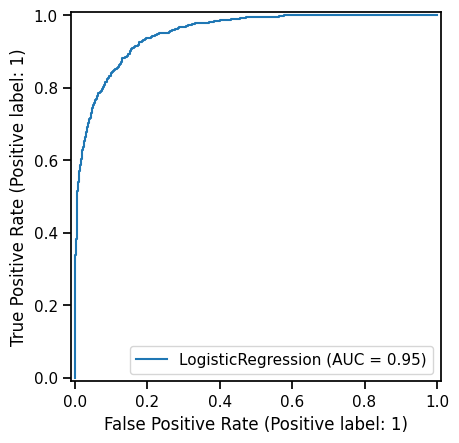

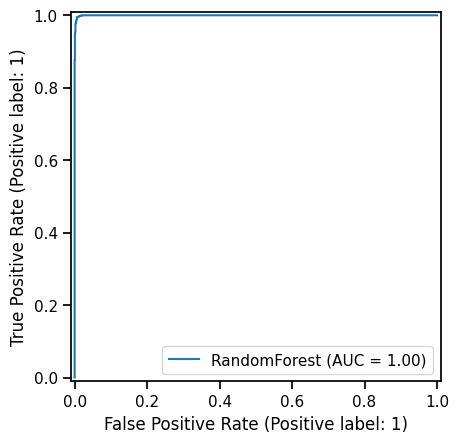

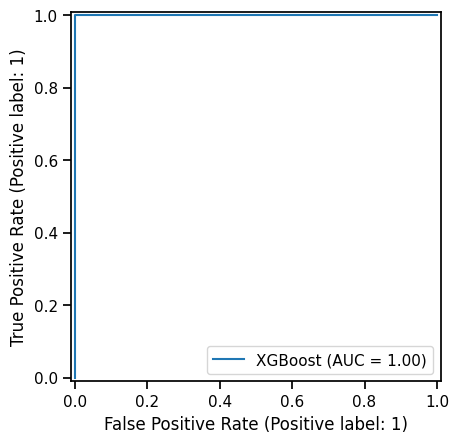

In [ ]:
# Curvas ROC comparadas

plt.figure(figsize=(7,5))

for nombre, modelo in modelos.items():
    y_prob = modelo.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_prob, name=nombre)
plt.show()


In [ ]:
#Importancia de variables (Random Forest)


rf_model = pipe_rf.named_steps["model"]
rf_pre = pipe_rf.named_steps["preprocess"]

feature_names = rf_pre.get_feature_names_out()
importances = rf_model.feature_importances_

imp_rf = (
    pd.DataFrame({
        "feature": feature_names,
        "importance": importances
    })
    .assign(feature=lambda x:
            x["feature"].str.replace("num__", "", regex=False)
                        .str.replace("cat__", "", regex=False)
           )
    .round(2)
    .sort_values("importance", ascending=False)
    .head(10)
)

imp_rf

,feature,importance
7,hemoglobina_glicosilada,0.19
4,tension_arterial_sistolica,0.16
3,imc,0.13
11,resultado_ldl,0.13
21,clasificacion_imc_Obesidad,0.10
5,tension_arterial_diastolica,0.07
9,colesterol_total,0.06
1,peso,0.04
10,resultado_hdl,0.02
22,clasificacion_imc_Sobrepeso,0.02


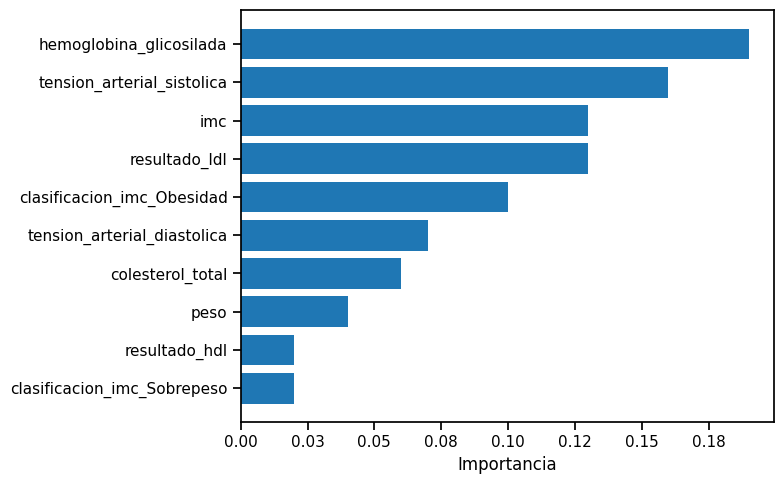

In [ ]:
#Top-10 (Random Forest)

plt.figure(figsize=(8,5))
plt.barh(imp_rf["feature"][::-1], imp_rf["importance"][::-1])

plt.xlabel("Importancia")

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.tight_layout()
plt.show()


In [ ]:
# Top-10 Importancia de Variables (XGBoost)
xgb_model = pipe_xgb.named_steps["model"]
xgb_pre = pipe_xgb.named_steps["preprocess"]

feature_names_xgb = xgb_pre.get_feature_names_out()
importances_xgb = xgb_model.feature_importances_

imp_xgb = (
    pd.DataFrame({
        "feature": feature_names_xgb,
        "importance": importances_xgb
    })
    .assign(feature=lambda x:
            x["feature"].str.replace("num__", "", regex=False)
                        .str.replace("cat__", "", regex=False)
           )
    .round(2)
    .sort_values("importance", ascending=False)
    .head(10)
)

imp_xgb



,feature,importance
21,clasificacion_imc_Obesidad,0.39
4,tension_arterial_sistolica,0.16
7,hemoglobina_glicosilada,0.14
11,resultado_ldl,0.11
5,tension_arterial_diastolica,0.08
3,imc,0.05
9,colesterol_total,0.04
8,albuminuria,0.02
10,resultado_hdl,0.01
1,peso,0.00


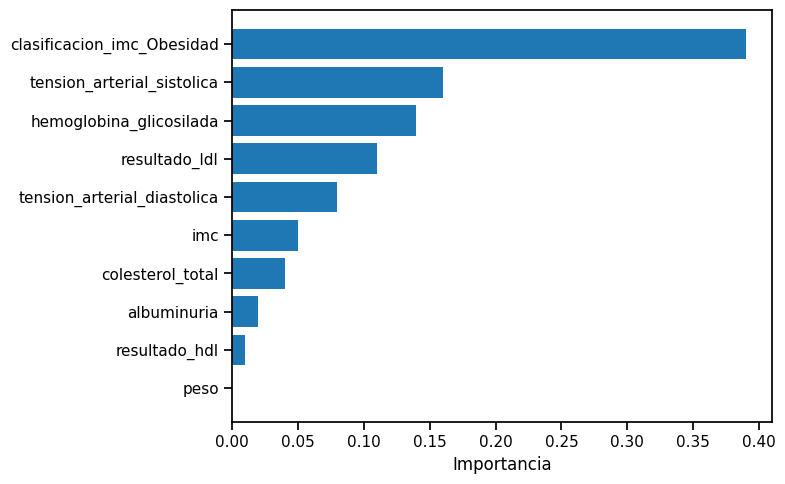

In [ ]:
#Top 10 (CGBoost)
plt.figure(figsize=(8,5))
plt.barh(imp_xgb["feature"][::-1], imp_xgb["importance"][::-1])
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()


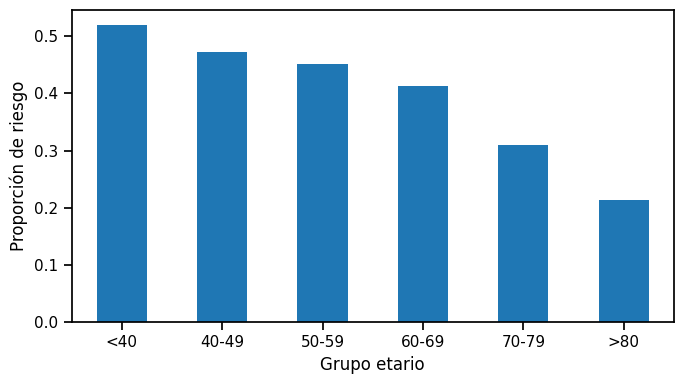

In [ ]:
# Distribuciones del riesgo por edad


df["grupo_edad"] = pd.cut(
    df["edad"],
    bins=[0,40,50,60,70,80,120],
    labels=["<40","40-49","50-59","60-69","70-79",">80"]
)

riesgo_edad = df.groupby("grupo_edad", observed=True)["riesgo_cardiovascular"].mean()

plt.figure(figsize=(7,4))
riesgo_edad.plot(kind="bar")

plt.ylabel("Proporción de riesgo")
plt.xlabel("Grupo etario")


plt.xticks(rotation=0)

plt.tight_layout()
plt.show()




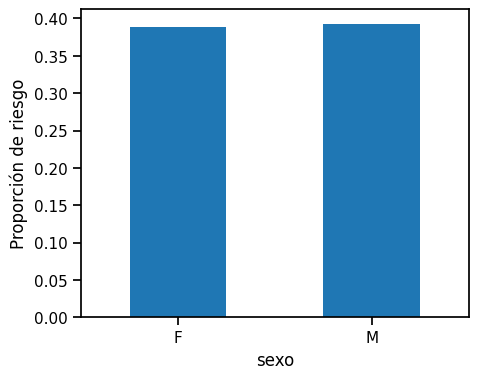

In [ ]:
# Distribución del riesgo por sexo

riesgo_sexo = df.groupby("sexo")["riesgo_cardiovascular"].mean()

plt.figure(figsize=(5,4))
riesgo_sexo.plot(kind="bar")
plt.ylabel("Proporción de riesgo")
plt.xticks(rotation=0)
plt.show()


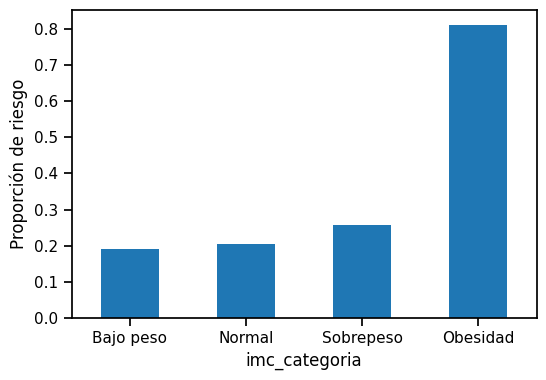

In [ ]:
#Riesgo por rangos de IMC

df["imc_categoria"] = pd.cut(
    df["imc"],
    bins=[0,18.5,25,30,100],
    labels=["Bajo peso","Normal","Sobrepeso","Obesidad"]
)

riesgo_imc = df.groupby("imc_categoria", observed=True)["riesgo_cardiovascular"].mean()

plt.figure(figsize=(6,4))
riesgo_imc.plot(kind="bar")
plt.ylabel("Proporción de riesgo")
plt.xticks(rotation=0)
plt.show()


#**Complemento del Estado del arte**

In [30]:
###ESTADO DEL ARTE"""""""""

def figura_importancia_y_riesgo(
    importancias,
    riesgo_alto=0.20,
    titulo_izq="Modelo predictivo",
    titulo_der="Distribución estimada del riesgo",
    color_alto="#E53935",   # rojo
    color_bajo="#1E5BD8"    # azul
):

    # ----- Datos panel izquierdo -----
    variables = [v for v, _ in importancias]
    vals = np.array([x for _, x in importancias], dtype=float)
    vals_norm = vals / vals.max() if vals.max() > 0 else vals
    colores = [color_alto if i < 3 else color_bajo for i in range(len(vals_norm))]
    fig = plt.figure(figsize=(12, 5), dpi=150)
    gs = fig.add_gridspec(1, 2, wspace=0.25)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])

    # Panel izquierdo: barras
    y = np.arange(len(variables))[::-1]
    ax1.barh(y, vals_norm[::-1], color=colores[::-1])
    ax1.set_yticks(y, labels=variables[::-1])
    ax1.set_xlim(0, 1.05)
    ax1.set_title(titulo_izq, fontsize=20, weight="bold", pad=18)
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    ax1.spines["bottom"].set_visible(False)
    ax1.tick_params(axis="x", bottom=False, labelbottom=False)

    # ----- Datos panel derecho -----
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)
    ax2.axis("off")
    ax2.set_title(titulo_der, fontsize=20, weight="bold", pad=18)

    # Barra 20/80
    alto = float(riesgo_alto)
    bajo = 1 - alto

    bar_y, bar_h = 0.72, 0.12
    left_x, total_w = 0.05, 0.90

    ax2.add_patch(Rectangle((left_x, bar_y), total_w * alto, bar_h, color=color_alto))
    ax2.add_patch(Rectangle((left_x + total_w * alto, bar_y), total_w * bajo, bar_h, color=color_bajo))

    ax2.text(left_x + total_w * alto / 2, bar_y + bar_h / 2,
             f"{int(round(alto*100))}%", color="white", ha="center", va="center",
             fontsize=14, weight="bold")
    ax2.text(left_x + total_w * alto + total_w * bajo / 2, bar_y + bar_h / 2,
             f"{int(round(bajo*100))}%", color="white", ha="center", va="center",
             fontsize=14, weight="bold")


    total_personas = 10
    n_alto = int(round(total_personas * alto))
    n_bajo = total_personas - n_alto
    xs = np.linspace(0.22, 0.82, 5)
    ys = [0.48, 0.30]

    personas_colores = [color_alto] * n_alto + [color_bajo] * n_bajo

    idx = 0
    for yy in ys:
        for xx in xs:
            if idx < total_personas:

                ax2.add_patch(Rectangle(
                    (xx - 0.02, yy - 0.035), 0.04, 0.07,
                    fill=False, linewidth=1.5, edgecolor=personas_colores[idx]
                ))
            idx += 1

    # ✅ Leyenda
    ax2.text(0.28, 0.12, "●", color=color_alto, fontsize=16, va="center")
    ax2.text(0.34, 0.12, "Riesgo alto", fontsize=13, va="center")

    ax2.text(0.62, 0.12, "●", color=color_bajo, fontsize=16, va="center")
    ax2.text(0.68, 0.12, "Riesgo bajo", fontsize=13, va="center")
    fig.lines.append(
        plt.Line2D([0.5, 0.5], [0.10, 0.90], transform=fig.transFigure,
                   color="#DDDDDD", linewidth=2)
    )

    plt.show()

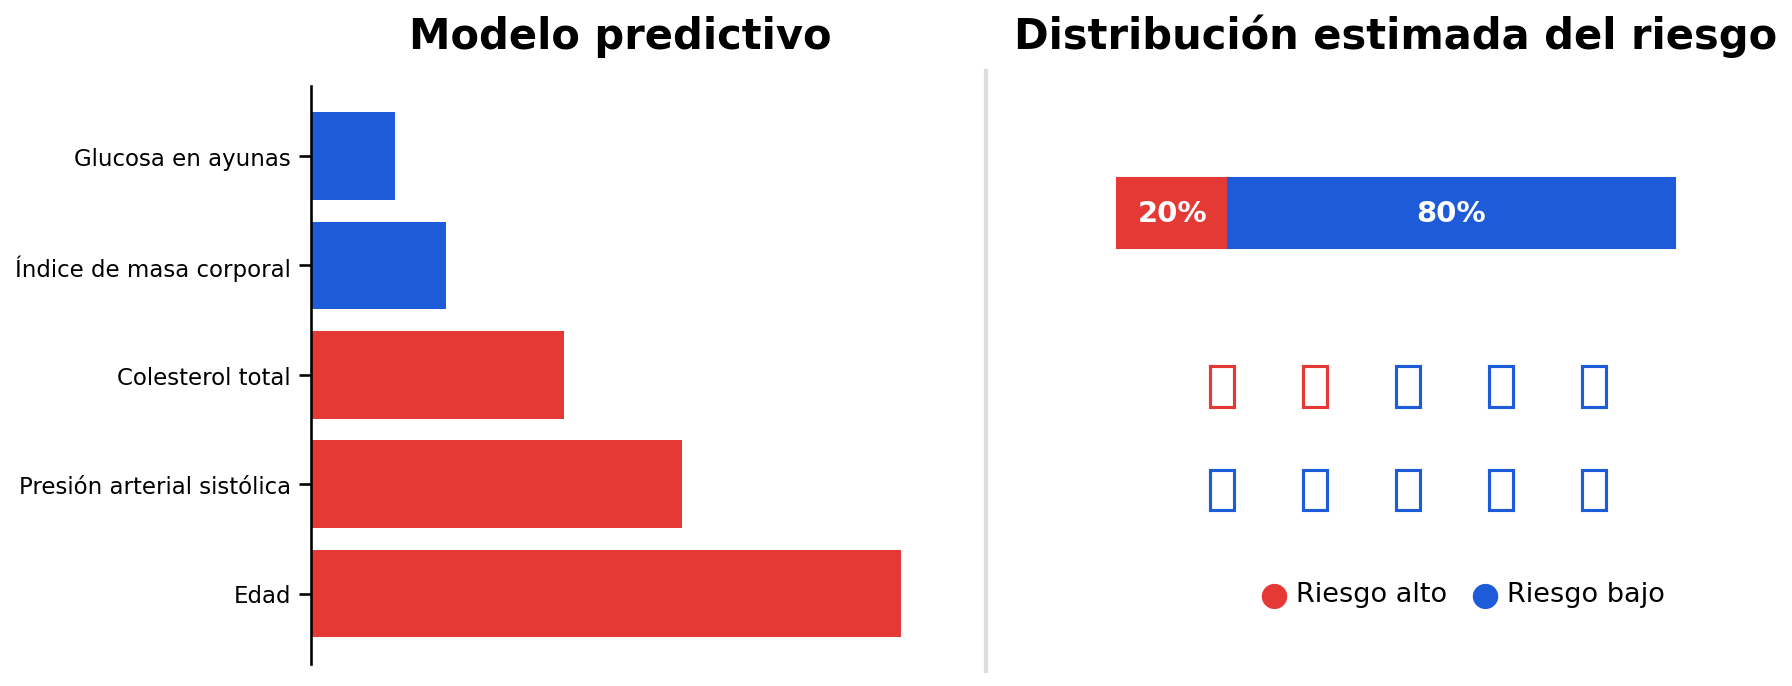

In [31]:
importancias = [
    ("Edad", 0.35),
    ("Presión arterial sistólica", 0.22),
    ("Colesterol total", 0.15),
    ("Índice de masa corporal", 0.08),
    ("Glucosa en ayunas", 0.05),
]

figura_importancia_y_riesgo(importancias, riesgo_alto=0.20)